# Trabajo computacional 1. Ejercicio 1

  Considere las tres redes de interacción de proteínas relevadas para levadura disponibles en la página de la materia. 
Se trata de: una red de interacciones binarias (yeast_Y2H.txt), de co-pertenencia a complejos proteicos (yeast_AP-MS.txt) y obtenida de literatura (yeast_LIT.txt) obtenidas del Yeast Interactome Database.

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

red_proteinas=ldata("data/yeast_AP-MS.txt")
red_binarias=ldata("data/yeast_Y2H.txt")
red_literatura=ldata("data/yeast_LIT.txt")
red_estrella=ldata("data/Estrella.txt")
red_clique=ldata("data/Clique.txt")

**a.** Presente una comparación gráfica de las 3 redes.

   Se llamará *"Red Proteinas"* a la red creada a partir del archivo *yeast_AP-MS.txt*,*"Red Binarias"* a la del archivo *yeast_Y2H.txt* y *"Red literatura"* a la del archivo *yeast_LIT.txt*.
    A continuación se observan los grafos obtenidos. Se tiene en cuenta el tipo de red -dirigida o no- a la hora de graficarlas (La determinación del tipo de red se muestra en el item **b.** *iii)* 


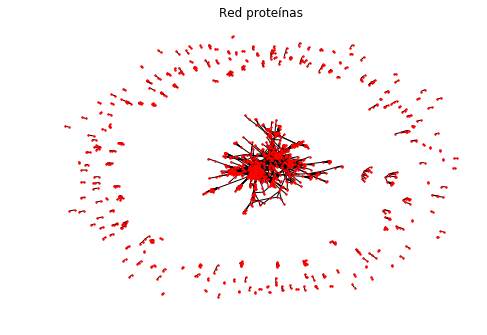

In [5]:
G = nx.Graph()#directed
G.add_edges_from(red_proteinas)
nx.draw(G, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red proteínas")
plt.show()



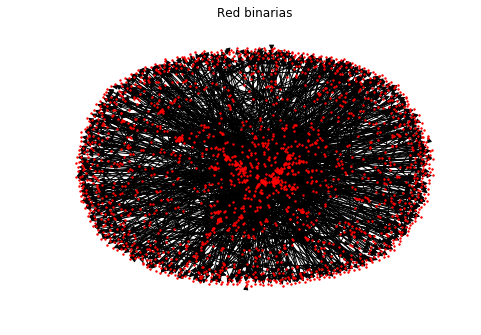

In [6]:
G1 = nx.DiGraph()#directed
G1.add_edges_from(red_binarias)
nx.draw(G1, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red binarias")
plt.show()


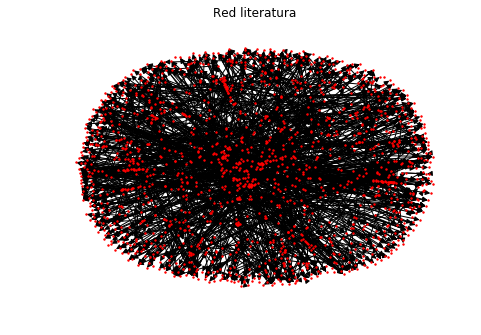

In [7]:
G2 = nx.DiGraph()#directed
G2.add_edges_from(red_literatura)
nx.draw(G2, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red literatura")
plt.show()


**b.** Resuma en una tabla las siguientes características de dichas redes: número de nodos, número de enlaces, si es dirigida o no, grado medio, grado máximo, grado mínimo, densidad de la red, coeficientes de clutering global y local, diámetro de la red.

*i. ii.* Para dar el número de nodos y enlaces se utilizaron las respectivas funciones del paquete *networkx*. 

   *iii.* A continuación se observa la forma en la que se determinó si las redes eran o no dirigidas. El método consistió en crear una lista que invierte el orden de las columnas, y luego compararla con la lista original de enlaces. Si existe al menos algún enlace en común entre ambas listas implica que es dirigida, ya que el enlace ij es distinto al ji. Para dar cuenta de ello se creo un entero de forma tal que al cumplirse  la condición anterior en una iteración le sumase una unidad. 
    Por ende, si al terminar de recorrer la lista el número final es mayor a cero la red es, por lo tanto, dirigida.


In [9]:
red_literatura_trans=[]
for j in red_literatura:
    red_literatura_trans.append([j[1],j[0]])
a_red_literatura=0
for j in red_literatura_trans:
    for i in red_literatura:
        if i==j:
            a_red_literatura+=1
print(a_red_literatura)


81


  La **Red Literatura** es *dirigida*

In [13]:
red_proteinas_trans=[]
for j in red_proteinas:
    red_proteinas_trans.append([j[1],j[0]])
a_red_proteinas=0
for j in red_proteinas_trans:
    for i in red_proteinas:
        if i==j:
            a_red_proteinas+=1
print(a_red_proteinas)

0


   La **Red Proteinas** es *no dirigida*

In [14]:
red_binarias_trans=[]
for j in red_binarias:
    red_binarias_trans.append([j[1],j[0]])
a_red_binarias=0
for j in red_binarias_trans:
    for i in red_binarias:
        if i==j:
            a_red_binarias+=1
print(a_red_binarias)

225


   La **Red Binaria** es *dirigida*

*iv.* Para calcular el grado medio, grado medio in o out se utilizó una función que se aplicase a las tres redes. La misma evalúa si la red es dirigida, de serlo devuelve el grado medio in y out en una lista,en caso de ser dirigida da el grado medio. Para el grado mínimo (máximo) se creó una función de la misma forma distinguiendo entre red dirigida y no dirigida y devolviendo una lista con el grado mínimo (máximo) in y out, o grado mínimo (máximo) respectivamente.

In [16]:
def K(H,a_R):
    if a_R >0:
        k_in=sum(H.in_degree(k) for k in H)/H.number_of_nodes()
        k_out=sum(H.out_degree(k) for k in H)/H.number_of_nodes()
        salida=[k_in,k_out]
    else:
        k=sum(H.degree(k) for k in H)/H.number_of_nodes()
        salida=[k]
    return salida


def Min(H,a_R):
    if a_R >0:
        M=min(H.in_degree(k) for k in H )
        Mbis=min(H.out_degree(k) for k in H )
        MINIMO=[M,Mbis]
        
    else:
        Mini=min(H.degree(k) for k in H)
        MINIMO=[Mini]
    return MINIMO

def Max(H, a_R):
    if a_R >0:
        Ma=max(H.in_degree(k) for k in H)
        Mabis=max(H.out_degree(k) for k in H)
        MAXIMO=[Ma, Mabis]
    else:
        Maxi=max(H.degree(k) for k in H)
        MAXIMO=[Maxi]
    return MAXIMO




Para calcular la densidad de la red se utilizó una función que distinguiese entre redes dirigidas y no dirigidas para utilizar la expresión correcta en cada caso.

In [17]:
def Den(H,a_R):
    if a_R>0:
        d=H.number_of_edges()/(H.number_of_nodes()*(H.number_of_nodes()-1)) #2 veces el numero posible de enlaces por ser dirigida
        dens=[d]
    else:
        d2=2* H.number_of_edges()/(H.number_of_nodes()*(H.number_of_nodes()-1))
        dens=[d2]
    return dens


Para calcular el diámetro de las redes se tuvo que considerar a todas las redes como no dirigidas usando una función de networkx, para poder utilizar la función *nx.diameter* que está definida para grafos no dirigidos. Otro factor que se tuvo en cuenta fue que las redes podían ser no conexas, por lo que la definicón de diámetro es un tanto esquiva. Por lo tanto se considero relevar el diámetro de la componente gigante de la red, si la red es conexa el diámetro dado coincide con el de la red completa. 

In [24]:
H1=nx.to_undirected(G1)
H2=nx.to_undirected(G2)
def Diam (H):
    
    Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True)
    #pos = nx.layout.spring_layout(H)
    G0 = Gcc[0]
    #nx.draw_networkx_edges(G0, pos, with_labels=False, edge_color='r', width=6.0)
    
    return nx.diameter(G0)

A continuación se exhibe la tabla con las características calculadas:

In [25]:
data = pd.DataFrame({"Red":["Proteinas","Binarias","Literatura"],"Nodos":[G.number_of_nodes(),G1.number_of_nodes(),G2.number_of_nodes()],
                     "Enlaces":[G.number_of_edges(),G1.number_of_edges(),G2.number_of_edges()],
                     "Dirigida":["No","Sí","Sí"],"Grado medio ([in, out])":[K(G,a_red_proteinas),K(G1,a_red_binarias),K(G2,a_red_literatura)],"Grado máximo([in,out])":[Max(G,a_red_proteinas),Max(G1,a_red_binarias),Max(G2,a_red_literatura)],"Grado mínimo([in,out])":[Min(G,a_red_proteinas),Min(G1,a_red_binarias),Min(G2,a_red_literatura)],"Densidad": [Den(G,a_red_proteinas),Den(G1,a_red_binarias),Den(G2,a_red_literatura)], "Clustering local":[nx.average_clustering(G),nx.average_clustering(H1),nx.average_clustering(H2)], "Clustering global":[nx.transitivity(G),nx.transitivity(G1),nx.transitivity(G2)],"Diámetro":[Diam(G),Diam(H1),Diam(H2)] })
data

,Red,Nodos,Enlaces,Dirigida,"Grado medio ([in, out])","Grado máximo([in,out])","Grado mínimo([in,out])",Densidad,Clustering local,Clustering global,Diámetro
0,Proteinas,1622,9070,No,[11.183723797780518],[127],[1],[0.006899274397150227],0.554636,0.618590,15
1,Binarias,2018,2930,Sí,"[1.4519326065411298, 1.4519326065411298]","[66, 38]","[0, 0]",[0.0007198475986817699],0.046194,0.014888,14
2,Literatura,1536,2925,Sí,"[1.904296875, 1.904296875]","[23, 35]","[0, 0]",[0.001240584283387622],0.292492,0.160304,19


**c.** Identifique con qué método se podrían haber reportado las interacciones en cada red.

   Hay distintos métodos de relevamiento para formar redes de proteínas: utilizando anticuerpos o con el sistema de doble híbrido (Y2H). Con un anticuerpo capatador de una proteína A se puede aislar un complejo de proteínas que contenga a A. Junto con esta pueden salir varias proteínas B,C,D. Esta información se puede relevar de distintas formas debido a que hay que traducir interacciones complejas en interacciones de tipo binarias. Una forma es usando un grafo tipo estrella: la proteína A interactúa con B, C y D, y éstas no interactúan entre sí, o bien en forma de cliqué, en donde todas las proteínas del complejo interactúan entre sí.
   

Se muestra a continuación el ejemplo de estos dos relevamientos:

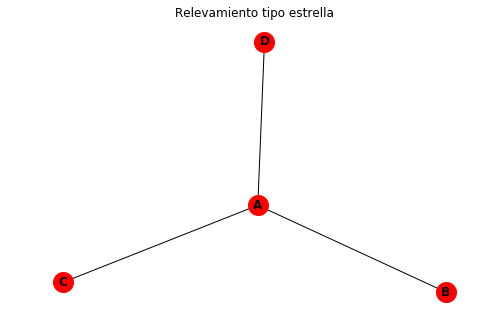

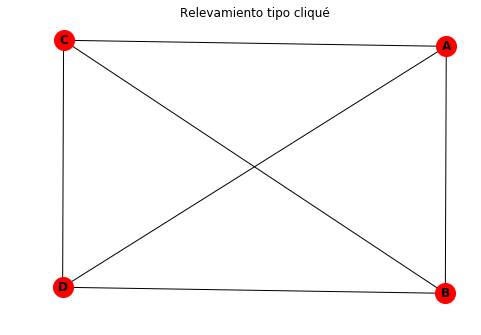

In [39]:
E = nx.Graph()#directed
E.add_edges_from(red_estrella)
nx.draw(E, with_labels=True, font_weight='bold',node_size=400)
plt.title("Relevamiento tipo estrella")
plt.show()

C = nx.Graph()#directed
C.add_edges_from(red_clique)
nx.draw(C, with_labels=True, font_weight='bold',node_size=400)
plt.title("Relevamiento tipo cliqué")
plt.show()

Evidentemente estas dos formas de relevamiento dan distintas características a las redes, como por ejemplo distinto clustering o grado medio. En el ejemplo anterior el grado medio de la red tipo estrella es 1,5, clustering global 0, mientras que en la cliqué el grado medio es 3 y su clustering es 1.

   Una forma de inferir el método usado en cada red es observando estos valores. (La red binaria está reportada con el método Y2H según el archivo por lo que no será tenida en cuenta para este análisis) La red proteínas tiene grado medio de orden 11 mientras que la red literatura es aproximádamente de 1,9. Asímismo el clustering global es mayor para la red de proteínas (sí bien esta información aislada no tiene mucha relevancia). Podríamos pensar que la red proteínas fue relevada con el método de anticuerpos y de tipo cliqué ya que el grado de los nodos, en promedio, es mucho mayor a las otras redes, así como su densidad y clustering, por lo que da alguna idea de que se generó un gran número de enlaces al pensar las interacciones en el complejo como un cliqué.
    De todas formas, no se tiene información de la cantidad de anticuerpos utilizados por lo que bien podría ser una red de tipo estrella pero con un gran número de anticuerpos utilizados, que concatenaran distintos complejos generando más enlaces.